# Synthetic time series generation
This notebook goes through how we generate time series syntheticly, using certain statistical properties. This is done in parallell to using an actual dataset, to see how the methods presented in the paper perform on controlled time series.

In [91]:
import numpy as np
from tqdm import tqdm
import random

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
sns.set_style("whitegrid")  # Apply a cleaner grid style

In [92]:
date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq='H')
time = np.arange(len(date_range))

/var/folders/t1/cjrcl1s578gdksfbv787y8x40000gn/T/ipykernel_98824/2618109919.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq='H')


## Linear trend
We use a linear trend in some of the time series

In [93]:
time

array([   0,    1,    2, ..., 8758, 8759, 8760])

<Axes: >

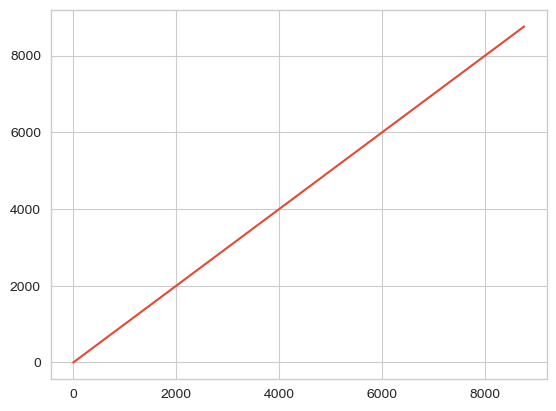

In [94]:
linear_trend = np.arange(0, len(time))
sns.lineplot(linear_trend)

In some instances it is interesting to see a completely random pattern. This is done using a random walk trend.

<Axes: >

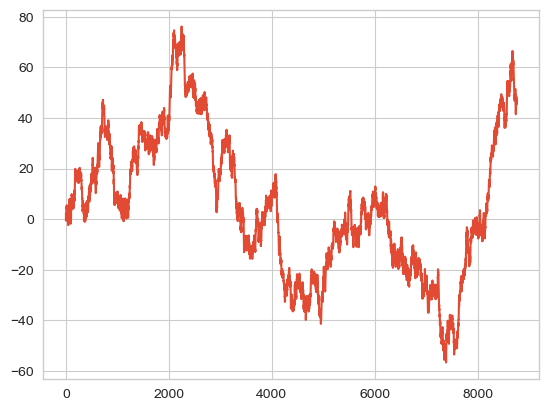

In [95]:
random_walk_trend = np.cumsum(np.random.randn(len(time)))  # Cumulative sum of random noise
sns.lineplot(random_walk_trend)

## Noise
We also add a certain set of random noise to the time series.

<Axes: >

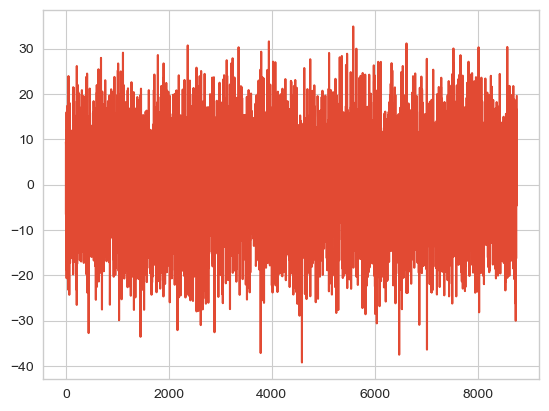

In [96]:
noise = np.random.normal(0, 10, len(time))
sns.lineplot(noise)

## Seasonality
We define a set of different seasonality, one that is daily, weekly and yearly. These can be combined to create interesting patterns

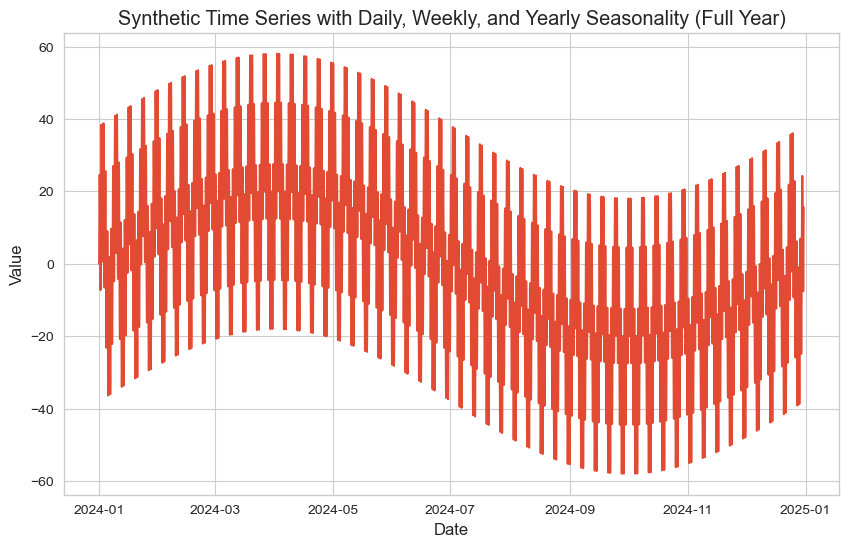

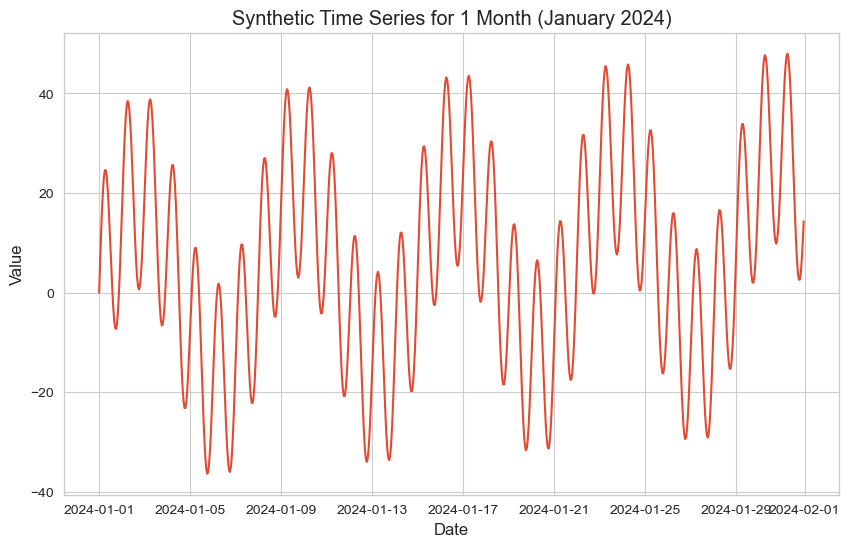

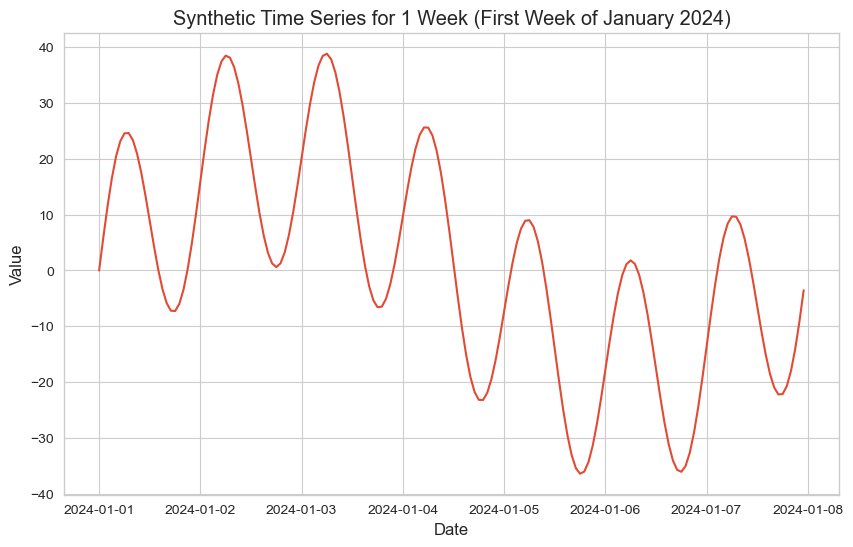

In [97]:
# Define the seasonal components (amplitudes)
A = 20   # Amplitude


daily_seasonality = A * np.sin(2 * np.pi * time / 24)
weekly_seasonality = A * np.sin(2 * np.pi * time / 168)
yearly_seasonality = A * np.sin(2 * np.pi * time / 8760)  

y = 0 \
   + weekly_seasonality \
   + daily_seasonality \
   + yearly_seasonality


data = pd.DataFrame({'Date': date_range, 'Value': y})

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Value'])
plt.title('Synthetic Time Series with Daily, Weekly, and Yearly Seasonality (Full Year)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

month_data = data[(data['Date'] >= '2024-01-01') & (data['Date'] < '2024-02-01')]

plt.figure(figsize=(10, 6))
plt.plot(month_data['Date'], month_data['Value'])
plt.title('Synthetic Time Series for 1 Month (January 2024)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

week_data = data[(data['Date'] >= '2024-01-01') & (data['Date'] < '2024-01-08')]

plt.figure(figsize=(10, 6))
plt.plot(week_data['Date'], week_data['Value'])
plt.title('Synthetic Time Series for 1 Week (First Week of January 2024)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


# Combinations
Finally we create a dataframe with a set of different time series. These are used in experiments going forwards

In [98]:
data = pd.DataFrame({
    'time': date_range, 
    'daily_seasonal_noise': daily_seasonality + np.random.normal(0, 5, len(time)),
    'weekly_seasonal_noise': weekly_seasonality + np.random.normal(0, 5, len(time)),
    'yearly_seasonal_noise': yearly_seasonality + np.random.normal(0, 5, len(time)),
    'daily_weekly_seasonal_noise': daily_seasonality + weekly_seasonality + np.random.normal(0, 5, len(time)),
    'daily_weekly_seasonal_noise_trend': daily_seasonality + weekly_seasonality + linear_trend + np.random.normal(0, 5, len(time)),
    'random_walk': random_walk_trend
})

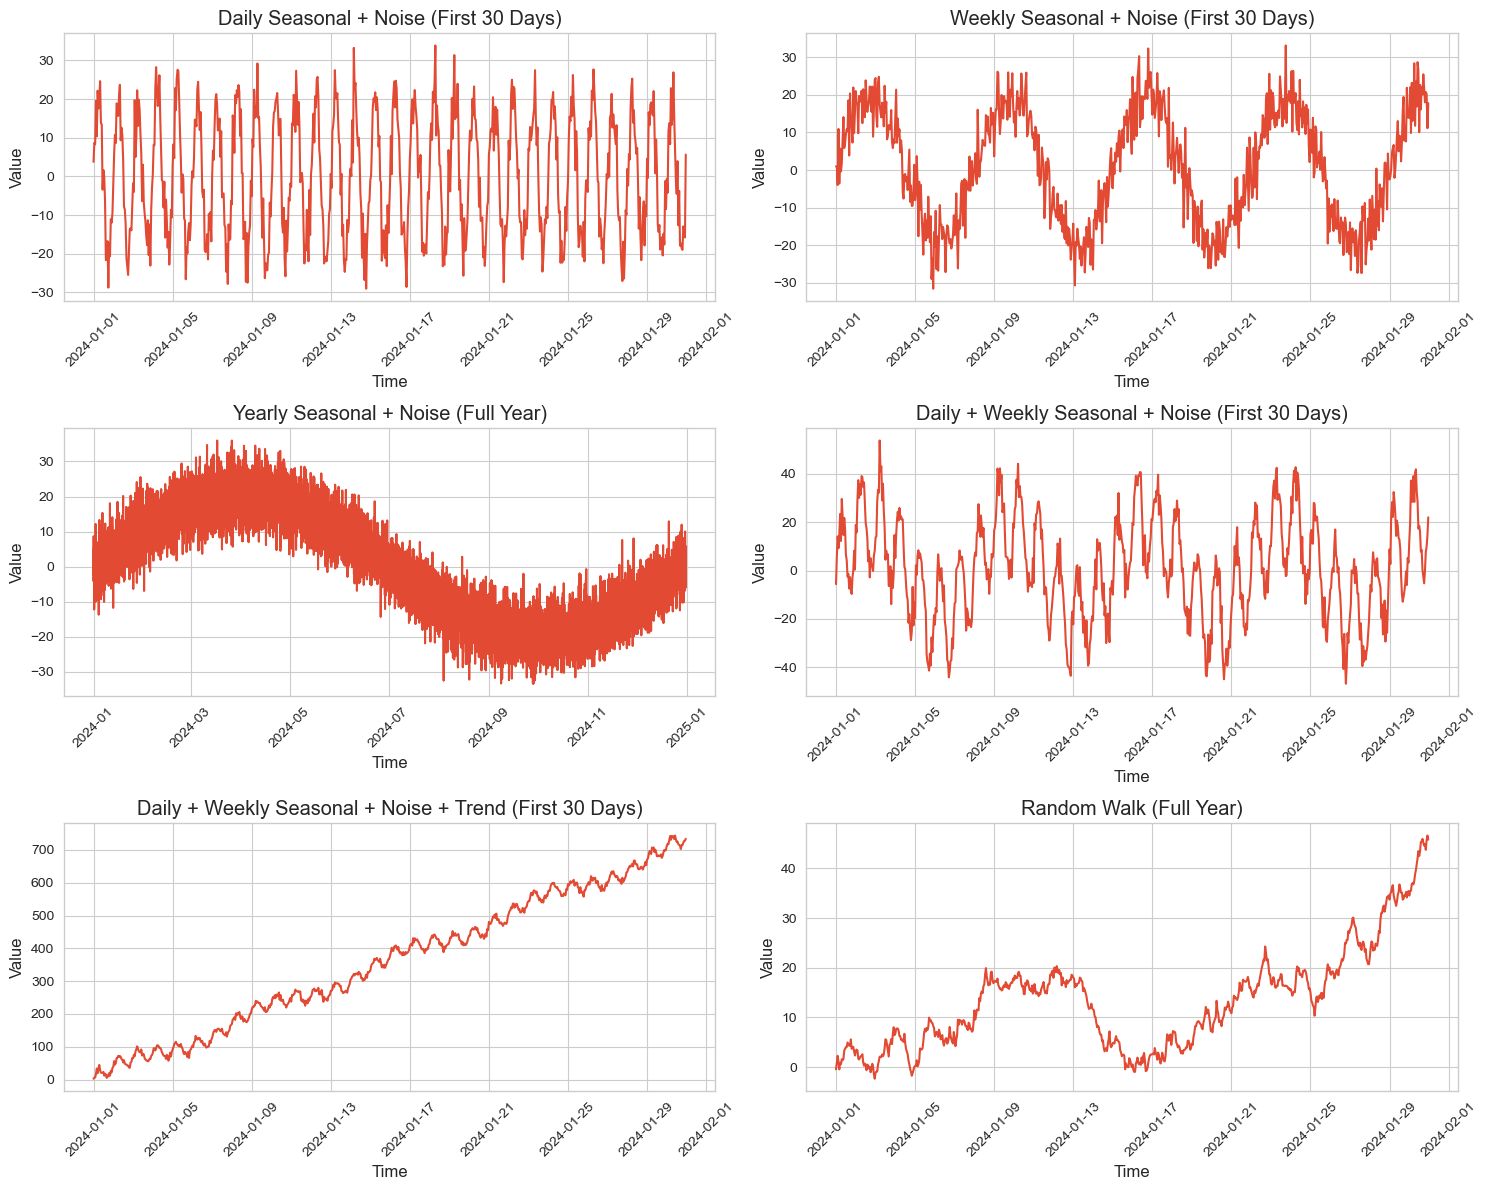

In [99]:
# Plotting the time series
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)  # 3 rows, 2 columns, first subplot
plt.plot(data['time'][:720], data['daily_seasonal_noise'][:720])  # First 30 days (30*24 = 720 hours)
plt.title('Daily Seasonal + Noise (First 30 Days)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)  # 3 rows, 2 columns, second subplot
plt.plot(data['time'][:720], data['weekly_seasonal_noise'][:720])  # First 30 days (30*24 = 720 hours)
plt.title('Weekly Seasonal + Noise (First 30 Days)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)  # 3 rows, 2 columns, third subplot
plt.plot(data['time'], data['yearly_seasonal_noise'])
plt.title('Yearly Seasonal + Noise (Full Year)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)  # 3 rows, 2 columns, fourth subplot
plt.plot(data['time'][:720], data['daily_weekly_seasonal_noise'][:720])  # First 30 days (30*24 = 720 hours)
plt.title('Daily + Weekly Seasonal + Noise (First 30 Days)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)  # 3 rows, 2 columns, fifth subplot
plt.plot(data['time'][:720], data['daily_weekly_seasonal_noise_trend'][:720])  # First 30 days (30*24 = 720 hours)
plt.title('Daily + Weekly Seasonal + Noise + Trend (First 30 Days)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.subplot(3, 2, 6)  # 3 rows, 2 columns, fifth subplot
plt.plot(data['time'][:720], data['random_walk'][:720])  # First 30 days (30*24 = 720 hours)
plt.title('Random Walk (Full Year)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

We save the time series to a .csv file

In [100]:
data['time'] = pd.to_datetime(data['time'])
data.to_csv('../data/naive_synthetic_timeseries_2024.csv')